In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython import display
from plotting import Ad_Figure,regret_plot

### **LOADING A SIMPLE DATASET**
Here we load a very simple dataset (no features)

In [87]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Dataset contains 10 different ads shown to 10000 user where 0/1 represents if user would click on that ad.

The goal is to always show the ad with the best CTR (click-through rate). The users have no features so this is a very simple problem.

In [88]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [89]:
print('Click through rate (CTR): ')
CTR = dataset.sum() / dataset.shape[0]
print(CTR)

Click through rate (CTR): 
Ad 1     0.1703
Ad 2     0.1295
Ad 3     0.0728
Ad 4     0.1196
Ad 5     0.2695
Ad 6     0.0126
Ad 7     0.1112
Ad 8     0.2091
Ad 9     0.0952
Ad 10    0.0489
dtype: float64


### **RANDOM POLICY**
During each round the bandit selects a completely random ad. This will be our baseline. 

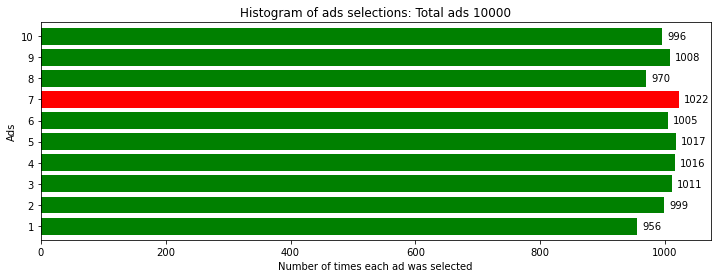

Maximum reward = 2695
Generated reward with random approach = 1239
Regret =  1456


In [90]:
'Random approach'
from matplotlib import style
'Initialize variables'
ads_selected = []
Fig1 = Ad_Figure()
style.use('dark_background')
random_approach = pd.DataFrame(0, index=np.arange(len(dataset)), columns=dataset.columns.values)
max_reward = dataset.sum().max()
regret_random = [max_reward]
plot_update = dataset.shape[0] #each Nth ad update the histogram

'Randomly select ad for each user and accumulate the reward'
for ind in range(dataset.shape[0]):
    selected_index = np.random.choice(dataset.shape[1], 1) #each user gets a random ad
    selected_index = selected_index[0]
    random_approach.iloc[ind,selected_index] = dataset.iloc[ind,selected_index]
    ads_selected.append(selected_index+1)
    regret_random.append(regret_random[-1]-dataset.iloc[ind,selected_index]) 
    if ind == 0:
        Fig1.ad_plot(ads_selected)
        hdisplay = display.display("", display_id=True)
    elif ind%plot_update == 0: #can be used to update the plot during cycle
        Fig1.update_plot(ads_selected)
        Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
        hdisplay.update(Fig1.fig)

'Plot and print final results'        
Fig1.update_plot(ads_selected)
Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
hdisplay.update(Fig1.fig)        
print(f'Maximum reward = {dataset.sum().max()}')
print(f'Generated reward with random approach = {random_approach.values.sum()}')
print(f'Regret = {regret_random[-1]: .0f}')
plt.close()


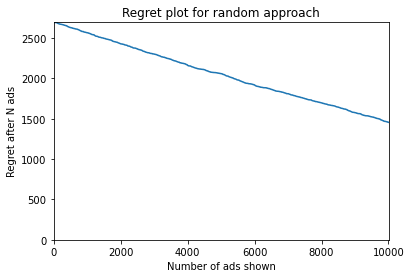

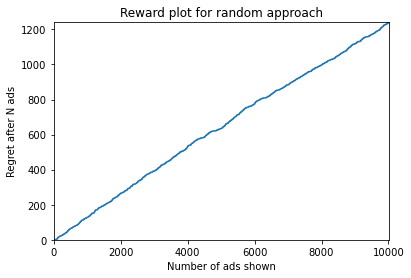

In [91]:
regret_plot(regret_random,title = 'Regret plot for random approach')
reward_random = [-(x-max_reward) for x in regret_random]
regret_plot(reward_random,title = 'Reward plot for random approach')

### **EPSILON GREEDY POLICY**
With 1-epsilon chance, the policy selects the best performin ad so far.
With epsilon chance, the policy selects a random ad.

Epsilon is therefore a hyperparameter that can be tunes to strike balance between exploration and exploitation.

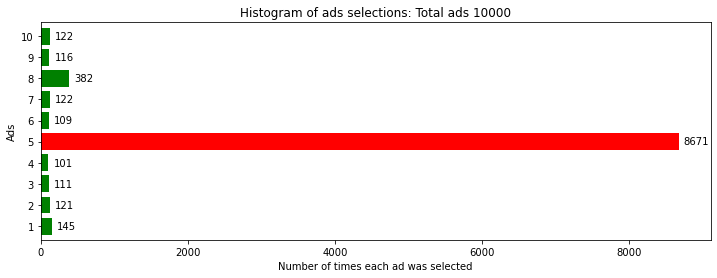

Maximum reward = 2695
Generated reward with e-greedy approach = 2518
Regret =  177


In [92]:
'Epsilon-greedy approach'

'Initialize variables'
e = 0.1
ads_selected = []
ad_reward = np.zeros(dataset.shape[1])
ad_count = np.zeros(dataset.shape[1])
best_ad = np.zeros(dataset.shape[1])
Fig1 = Ad_Figure()
epsilon_approach = pd.DataFrame(0, index=np.arange(len(dataset)), columns=dataset.columns.values)
max_reward = dataset.sum().max()
regret_epsilon = [max_reward]
plot_update = dataset.shape[0] #each Nth ad update the histogram

'''with 1-e chance select the current best for each user
   and with e chance select random ad'''
for ind in range(dataset.shape[0]):
    if ind>0 and random.random()<e:
        selected_index = np.random.choice(np.argwhere(best_ad != np.amax(best_ad))[:,0]) #each user gets a random ad (not best)
    else:    
        selected_index = np.random.choice(np.argwhere(best_ad == np.amax(best_ad))[:,0]) #each user gets a random best ad
    epsilon_approach.iloc[ind,selected_index] = dataset.iloc[ind,selected_index]
    ads_selected.append(selected_index+1)
#     cum_regret.append(max_reward*(ind+1)/dataset.shape[0]-(cum_regret[-1]+dataset.iloc[ind,random_index]))
    regret_epsilon.append(regret_epsilon[-1]-dataset.iloc[ind,selected_index])
    ad_count[selected_index] += 1
    ad_reward[selected_index] += dataset.iloc[ind,selected_index]
    best_ad[selected_index] = ad_reward[selected_index]/ad_count[selected_index] #calculates the success probabilty
    if ind == 0:
        Fig1.ad_plot(ads_selected)
        hdisplay = display.display("", display_id=True)
    elif ind%plot_update == 0: #can be used to update the plot during cycle
        Fig1.update_plot(ads_selected)
        Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
        hdisplay.update(Fig1.fig)
        
'Plot and print final results'        
Fig1.update_plot(ads_selected)
Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
hdisplay.update(Fig1.fig)     
print(f'Maximum reward = {dataset.sum().max()}')
print(f'Generated reward with e-greedy approach = {epsilon_approach.values.sum()}')
print(f'Regret = {regret_epsilon[-1]: .0f}')
plt.close()

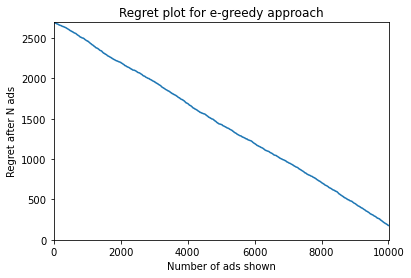

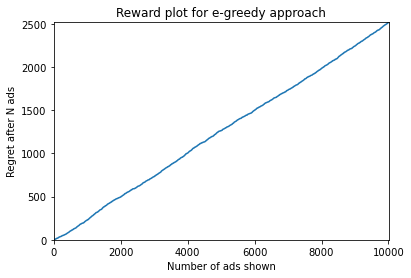

In [93]:
regret_plot(regret_epsilon,title = 'Regret plot for e-greedy approach')
reward_epsilon = [-(x-max_reward) for x in regret_epsilon]
regret_plot(reward_epsilon,title = 'Reward plot for e-greedy approach')

### **UPPER CONFIDENCE BOUND APPROACH (UCB1)**
At each round, the policy selects the ad with the highest upper confidence bound. This ensures that we select every ad at least a few times before we are sure about the mean reward.
image1.png

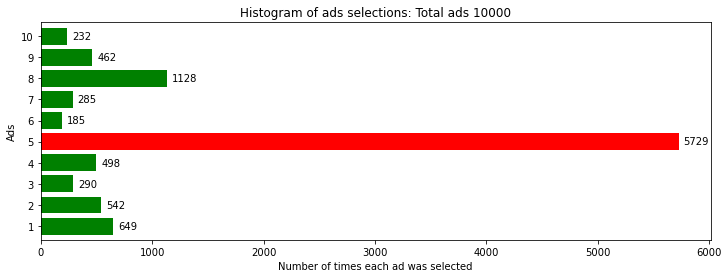

Maximum reward = 2695
Generated reward with UCB approach = 2079
Regret =  616


In [94]:
'Upper confident bound approach (UCB1)'

'Initialize variables'
ads_selected = []
ad_reward = np.zeros(dataset.shape[1])
ad_count = np.zeros(dataset.shape[1])
best_ad = np.zeros(dataset.shape[1])
modified_best = np.zeros(dataset.shape[1])
Fig1 = Ad_Figure()
UCB_approach = pd.DataFrame(0, index=np.arange(len(dataset)), columns=dataset.columns.values)
max_reward = dataset.sum().max()
regret_UCB = [max_reward]
plot_update = dataset.shape[0] #each Nth ad update the histogram

'''In the beginning, select each ad once, then select ads with
best expected reward modified by the number of times they were selected'''
for ind in range(dataset.shape[0]):
    if ind<dataset.shape[1]:
        selected_index = np.random.choice(np.argwhere(ad_count == 0)[:,0]) #select each ad at least once
    else:    
        modified_best = best_ad + np.sqrt( 2 * np.log(ind+1) / ad_count) #modified reward function for sampling
        selected_index = np.random.choice(np.argwhere(modified_best == np.amax(modified_best))[:,0]) #each user gets a random best ad
    UCB_approach.iloc[ind,selected_index] = dataset.iloc[ind,selected_index]
    ads_selected.append(selected_index+1)
#     cum_regret.append(max_reward*(ind+1)/dataset.shape[0]-(cum_regret[-1]+dataset.iloc[ind,random_index]))
    regret_UCB.append(regret_UCB[-1]-dataset.iloc[ind,selected_index])
    ad_count[selected_index] += 1
    ad_reward[selected_index] += dataset.iloc[ind,selected_index]
    best_ad[selected_index] = ad_reward[selected_index]/ad_count[selected_index] 
    if ind == 0:
        Fig1.ad_plot(ads_selected)
        hdisplay = display.display("", display_id=True)
    elif ind%plot_update == 0: #can be used to update the plot during cycle
        Fig1.update_plot(ads_selected)
        Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
        hdisplay.update(Fig1.fig)
        
'Plot and print final results'        
Fig1.update_plot(ads_selected)
Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
hdisplay.update(Fig1.fig)     
print(f'Maximum reward = {dataset.sum().max()}')
print(f'Generated reward with UCB approach = {UCB_approach.values.sum()}')
print(f'Regret = {regret_UCB[-1]: .0f}')
plt.close()

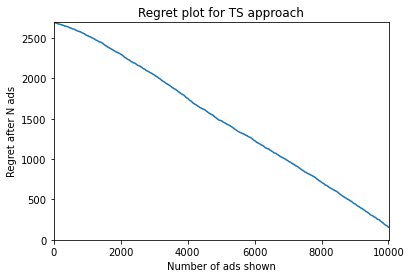

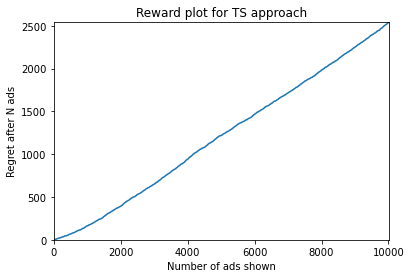

In [95]:
'''
    It seems that UCB is not as robust for dataset with similar means...'''
regret_plot(regret_TS,title = 'Regret plot for TS approach')
reward_TS = [-(x-max_reward) for x in regret_TS]
regret_plot(reward_TS,title = 'Reward plot for TS approach')

### **THOMPSON SAMPLING**
At each round, we select the ad with the highest randomly generated reward from posterior distribution.
Usually we use beta distributions because they are very easily updatable for binary rewards.
It rquires a prior distribution. Commonly this is initial beta(1,1) prior ~ uniform distribution, hence no prior knoledge.
THOMPSON SAMPLING WITH THE ONLINE BOOTSTRAP By Dean Eckles and Maurits Kaptein

Historical knoledge can be applied by grouping ads into similar groups and calculating the 
cumulative CTR distribution from past data. Then it can be fitted with beta(x,y)

Thompson can be problematic for a lot of ads with near optimal solutions and problems that dont require exploration.

TS is effective at minimizing the exploration costs required to converge
on an optimal action. It may perform poorly, however, in time-sensitive
learning problems where it is better to exploit a high performing suboptimal 
action than to invest resources exploring actions that might offer slightly improved performance.

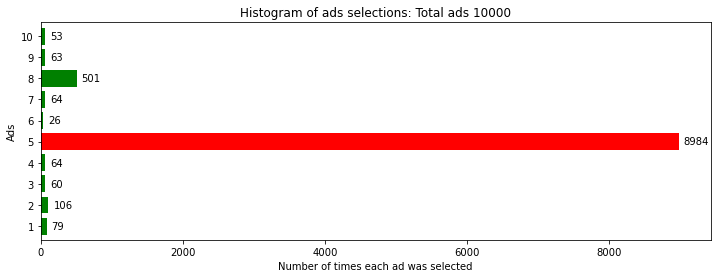

Maximum reward = 2695
Generated reward with TS approach = 2567
Regret =  128


In [99]:
'Thompson sampling (TS) - beta prior'
'Useful property is that alphas and betas can be easily updated by (αk, βk) + (r, 1 − r) '
'Initialize variables'
ads_selected = []
ad_reward = np.zeros(dataset.shape[1])
ad_count = np.zeros(dataset.shape[1])
alphas = np.ones(dataset.shape[1]) #initial value of alpha 
betas = np.ones(dataset.shape[1]) #initial value of beta 
sample = np.zeros(dataset.shape[1])
Fig1 = Ad_Figure()
TS_approach = pd.DataFrame(0, index=np.arange(len(dataset)), columns=dataset.columns.values)
max_reward = dataset.sum().max()
regret_TS = [max_reward]
plot_update = dataset.shape[0] #each Nth ad update the histogram

'''In the beginning, select each ad once, then select ads with
best expected reward modified by the number of times they were selected'''
for ind in range(dataset.shape[0]):
    sample = np.random.beta(alphas,betas)
    selected_index = np.random.choice(np.argwhere(sample == np.amax(sample))[:,0]) #each user gets a random best ad
    TS_approach.iloc[ind,selected_index] = dataset.iloc[ind,selected_index]
    ads_selected.append(selected_index+1)
#     cum_regret.append(max_reward*(ind+1)/dataset.shape[0]-(cum_regret[-1]+dataset.iloc[ind,random_index]))
    regret_TS.append(regret_TS[-1]-dataset.iloc[ind,selected_index])
    ad_count[selected_index] += 1
    ad_reward[selected_index] += dataset.iloc[ind,selected_index]
    alphas[selected_index] += dataset.iloc[ind,selected_index]
    betas[selected_index] += 1 - dataset.iloc[ind,selected_index]
    if ind == 0:
        Fig1.ad_plot(ads_selected)
        hdisplay = display.display("", display_id=True)
    elif ind%dataset.shape[0] == 0: #can be used to update the plot during cycle
        Fig1.update_plot(ads_selected)
        Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
        hdisplay.update(Fig1.fig)
        
'Plot and print final results'        
Fig1.update_plot(ads_selected)
Fig1.ax.set_title(f'Histogram of ads selections: Total ads {ind+1}')
hdisplay.update(Fig1.fig)     
print(f'Maximum reward = {dataset.sum().max()}')
print(f'Generated reward with TS approach = {TS_approach.values.sum()}')
print(f'Regret = {regret_TS[-1]: .0f}')
plt.close()

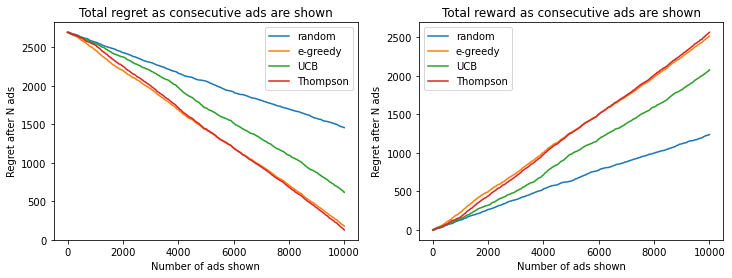

In [100]:
'plot regrets and rewards of all methods'
x = [i+1 for i in range(dataset.shape[0])]
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
plt.plot(x,regret_random[1:],x,regret_epsilon[1:],x,regret_UCB[1:],x,regret_TS[1:])
ax1.set_title('Total regret as consecutive ads are shown')
ax1.set_xlabel('Number of ads shown')
ax1.set_ylabel('Regret after N ads')
ax1.legend(['random', 'e-greedy', 'UCB', 'Thompson'])
reward_random = [-(x-max_reward) for x in regret_random]
reward_epsilon = [-(x-max_reward) for x in regret_epsilon]
reward_UCB = [-(x-max_reward) for x in regret_UCB]
reward_TS = [-(x-max_reward) for x in regret_TS]
ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x,reward_random[1:],x,reward_epsilon[1:],x,reward_UCB[1:],x,reward_TS[1:])
ax2.set_title('Total reward as consecutive ads are shown')
ax2.set_xlabel('Number of ads shown')
ax2.set_ylabel('Regret after N ads')
ax2.legend(['random', 'e-greedy', 'UCB', 'Thompson'])
# ax1.set_xlim(0,len(regret))
# ax1.set_ylim(0,max(regret)+1)


# regret_plot([x,regret_TS],title = 'Regret plot for UCB approach')
# 
# regret_plot(reward_TS,title = 'Reward plot for UCB approach')